<h2><center>Shaheer Ahmad Khan</center></h2>
<h2><center>265812</center></h2>
<h2><center>Lab 7</center></h2>


### Using Method 1 (matplotlib)

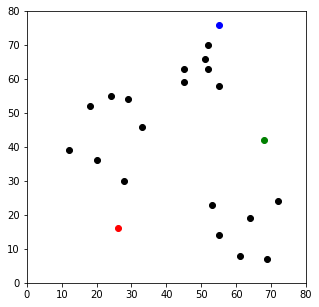

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df=pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72], 
    'y' : [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
    })
np.random.seed (200) 
k = 3
# centroids[i]=[x, y] 
centroids = { 
        i+1: [np.random.randint(0, 80), np.random.randint(0,80)]
				for i in range(k)
}
fig =plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'red', 2: 'green', 3: 'blue',4:'brown',5:'orange'} 
for i in centroids.keys():
	plt.scatter(*centroids[i], color=colmap[i]) 
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1   red
1  20  36        20.880613        48.373546        53.150729        1   red
2  28  30        14.142136        41.761226        53.338541        1   red
3  18  52        36.878178        50.990195        44.102154        1   red
4  29  54        38.118237        40.804412        34.058773        3  blue


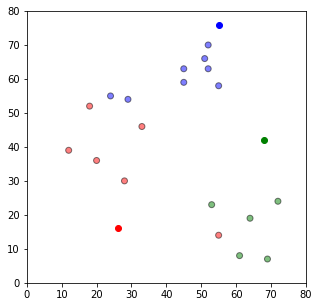

In [145]:
## Assignment Stage
def assignment(df, centroids):
	for i in centroids.keys():
			df['distance_from_{}'.format(i) ]=(
				np.sqrt(
					(df['x']- centroids[i][0]) ** 2
					+ (df['y']-centroids[i][1]) ** 2
				)
			)
	centroid_distance_cols =['distance_from_{}'.format(i) for i in centroids.keys()]
	df['closest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
	df['closest']= df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
	df['color']= df['closest'].map(lambda x: colmap[x])
	return df

df = assignment(df, centroids)
print(df.head())


fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
	plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


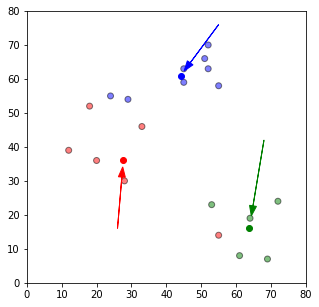

In [146]:
## update stage
import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
	for i in centroids.keys():
			centroids[i][0]=np.mean(df[df['closest']==i]['x'])
			centroids[i][1]=np.mean(df[df['closest']==i]['y'])  		
	return k
centroids=update(centroids)
fig=plt.figure(figsize=(5,5))
ax=plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')

for i in centroids.keys():
	plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0, 
         80)
plt.ylim(0, 80)
for i in old_centroids.keys():
		old_x=old_centroids[i][0]
		old_y=old_centroids[i][1]
		dx= (centroids[i][0] - old_centroids[i][0])*0.75
		dy= (centroids[i][1] - old_centroids[i][1])*0.75
		ax.arrow(old_x,old_y,dx,dy,head_width=2,head_length=3,fc=colmap[i],ec=colmap[i])
plt.show()


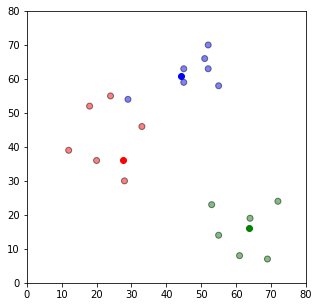

In [147]:
## Repeat the Assignment Stage
df = assignment(df, centroids)

# Plot Results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
	plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

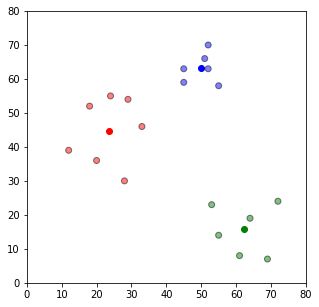

In [148]:
## Continue until all assigned categories don't change any more
while True:
		closest_centroid=df['closest'].copy(deep=True)
		centroids=update(centroids)
		df = assignment(df, centroids)
		if closest_centroid.equals(df['closest']):
			break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'],df['y'], color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
	plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

### Using Method 2 (Sklearn)

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(200)
from sklearn.cluster import KMeans

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

number_of_clusters=5

kmeans = KMeans(n_clusters=number_of_clusters)  #here n_clusters is selected as 2 randomly.
kmeans.fit(df)


KMeans(n_clusters=5)

In [172]:
labels = kmeans.predict(df)
labels

array([0, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 4, 4, 1, 4, 1])

In [173]:
centroids = kmeans.cluster_centers_
centroids

array([[20.        , 35.        ],
       [63.        , 22.        ],
       [50.        , 63.16666667],
       [26.        , 51.75      ],
       [61.66666667,  9.66666667]])

['red', 'red', 'red', 'orange', 'orange', 'orange', 'orange', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'green', 'brown', 'brown', 'green', 'brown', 'green']


(0.0, 80.0)

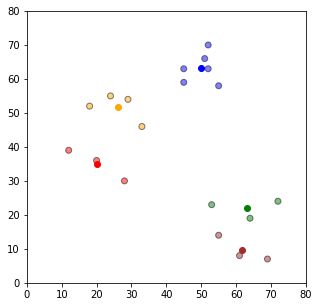

In [174]:
fig, ax = plt.subplots(figsize=(5, 5))
colmap = {1: "red", 2: "green", 3: "blue" ,4:"orange",5:"brown"}
colors = map(lambda x: colmap[x+1], labels)
colors1=list(colors)
print(colors1)

ax.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    ax.scatter(*centroid, color=colmap[idx+1])
ax.set_xlim(0, 80)
ax.set_ylim(0, 80)

In [176]:

from sklearn.metrics import mean_squared_error
# Given values
Y_true = [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]  # Y_true = Y (original values)
# calculated values
Y_pred=[]
for label in labels:
  Y_pred.append(centroids[label][1])
# Calculation of Mean Squared Error (MSE)
print("MSE for k = %d is : %f" % (number_of_clusters,mean_squared_error(Y_true,Y_pred)))

MSE for k = 5 is : 12.223684


<h3>So I think for k=5 is the best value for the model since the sum of mean squares is nearest to zero for K=5.As we know sum of mean square touching zero means perfect model.</h4>
At k=3 		Error=49.546366 <br/>
At k=4 		Error=24.232456 <br/>
At k=5 		Error=12.223684